<a href="https://colab.research.google.com/github/Nishi-sys/Deep_Learning/blob/main/DL/Loan%20Prediction/Solving_Loan_Prediction_problem_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version.x

UsageError: Line magic function `%tensorflow_version.x` not found.


# Steps to build a Neural Network using Keras (#LCD,CTE)

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

---



In [3]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.2.2


In [14]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [15]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [17]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [19]:
# removing the loan_ID since these are just the unique and serve as keys in DB
data = data.drop('Loan_ID', axis=1) #axis=0 ['Loan_ID'] not found in axis"

In [20]:
# looking at the shape of the data
data.shape

(614, 12)

In [21]:
# separating the independent and dependent variables

# Storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# Storing the dependent variable as y
y = data['Loan_Status']

In [22]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

---



In [23]:
# Creating training and validation set

# X:input, X_train: on which input model will be trained using y_train.
# X_test: Set of inputs on which the model(model created using X_train, y_train) will be tested. So these generates an ouput from X_test: Y
# So, then Y(output from X_test) is comapred with actual output of X_test i.e. y_test

# stratify(on the o/p feature) will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set
#X_train, X_trest, y_train, y_test

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [24]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

---



In [27]:
# checking the version of keras
import keras
print(keras.__version__)
# importing the sequential model
from keras.models import Sequential

2.15.0


In [26]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

### b. Defining different layers



In [28]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

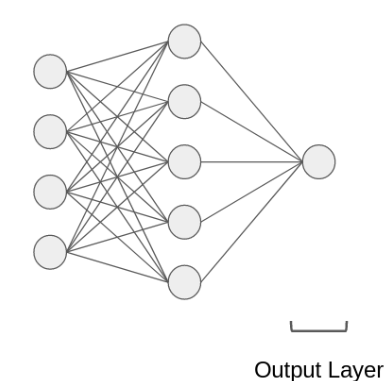

In [29]:
# number of input neurons
X_train.shape

(491, 11)

In [30]:
# number of features in the data
X_train.shape[1]

11

In [31]:
# defining input neurons = no. of input features
input_neurons = X_train.shape[1]

In [32]:
# number of output neurons
# since loan prediction is a binary classification problem, we will have single neuron in the output layer
# define number of output neurons

output_neurons = 1

In [33]:
# number of hidden layers and hidden neurons
# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own
# define hidden layers and neuron in each layer

number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# for now I have picked relu as an activation function for 2 hidden layers
# since it is a binary classification problem, used sigmoid activation function in the final layer

In [34]:
# defining the architecture of the model   #Dense(units=#neuron_hidden_layerORoutput, activation)
from keras.models import Sequential
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

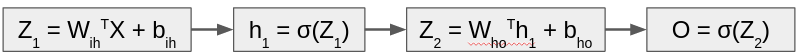

In [35]:
# summary of the model
model.summary()      # X = 11(no. of input features) x N(no. of observations i.e. no. of rows in the input dataset)
#w_ih:Shape of w_ih: no. of neurons in input layer(features) x number of neurons at hidden layer : 11 x 10 = 110 --> W_ih.T x X = (11 x 10).T x (11 x N) --> 10 x N



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# number of parameters between input and first hidden layer


input_neurons*neuron_hidden_layer_1

110

In [37]:
# number of parameters between input and first hidden layer
# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [38]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [39]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

---



In [40]:
# compiling the model #model.compile(l,o,m)

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

---



In [41]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 19ms/step - loss: 0.7630 - accuracy: 0.3646 - val_loss: 0.7361 - val_accuracy: 0.4553
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7173 - accuracy: 0.4847 - val_loss: 0.7035 - val_accuracy: 0.5610
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.6008 - val_loss: 0.6902 - val_accuracy: 0.6016
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.6640 - val_loss: 0.6836 - val_accuracy: 0.6748
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.6823 - val_loss: 0.6797 - val_accuracy: 0.6748
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.7006 - val_loss: 0.6763 - val_accuracy: 0.7073
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6718 - accuracy: 0.7169 - val_loss: 0.6679 - val_accuracy: 0.7236
Epoch 8/50
16/16 [=

## 6. Evaluating model performance on validation set

---



In [58]:
# getting predictions for the validation set

#predict_x=model.predict(X_test)
#print(predict_x) #for the X_test output
#classes_x=np.argmax(predict_x,axis=1)
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 2ms/step


In [63]:
print(predict_x)
print("\n",predictions)
print("y_test \n", y_test)

507    0.0
493    1.0
434    1.0
125    1.0
294    1.0
      ... 
82     0.0
295    1.0
369    0.0
450    0.0
363    1.0
Name: Loan_Status, Length: 123, dtype: float64


In [59]:
# calculating the accuracy on validation set
#accuracy_score(y_test, classes_x) -->0.3089430894308943
accuracy_score(y_test, classes_x) -->0.3089430894308943

0.8130081300813008

### Visualizing the model performance

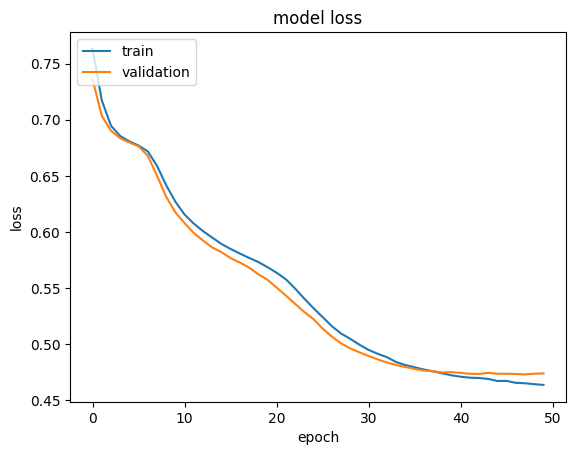

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

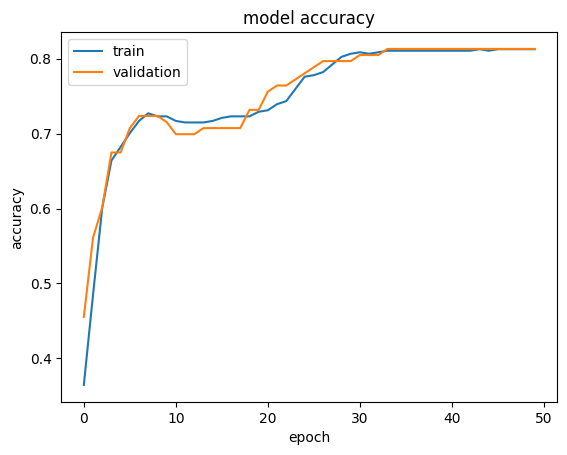

In [55]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()